## Setup

In [1]:
import sys
sys.path.extend(['/home/zadiq/dev/salt', 
                 '/home/zadiq/dev/competitions/salt', 
                 '/home/zoguntim/dev/s9043nfqhq89gh423qhjbfu89b4tj1qbfug8943'])

from tgs import allocate_gpu
allocate_gpu()

from tgs.dataset import SaltDataset
from tgs.models import TrainConfig, UNET
from keras.callbacks import ReduceLROnPlateau
from tgs.metrics import weighted_bce_dice_loss

%matplotlib inline

Using TensorFlow backend.


dataset = SaltDataset()
dataset.display_batch(next(dataset.val_gen))

---

# Dummy

T = TrainConfig()
T.loss_at = True
T.loss_log = False
T.which_loss = 'slow_map_iou'

model = UNET(which='bn',)
model.compile(loss=T.get_wrapped_loss, optimizer="adam", metrics=T.metrics)

model.summary()

reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00005, verbose=1)
history = model.fit_generator(
    dataset.train_gen, steps_per_epoch=125, 
    epochs=200, callbacks=[reduce_lr],
    validation_data=dataset.val_gen,
    validation_steps=125
)

model.save_weights('./keras.model')

sample_batch = next(dataset.train_gen)
pred = model.predict(sample_batch[0])
dataset.display_batch((sample_batch[1], pred))

---

## Model

Found 3200 images belonging to 1 classes.
Found 800 images belonging to 1 classes.
Found 3200 images belonging to 1 classes.
Found 800 images belonging to 1 classes.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 64) 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128

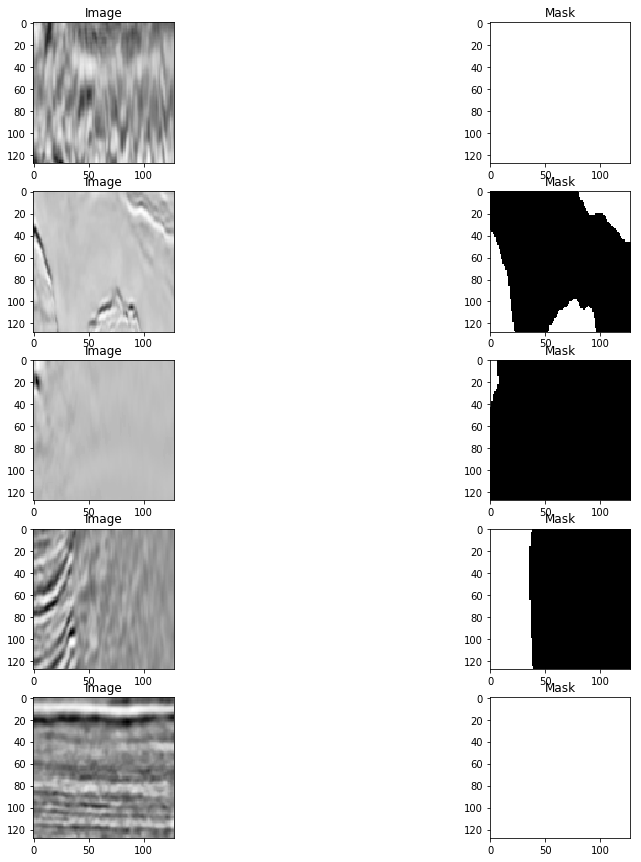

In [2]:
# ----------- config ---------------- #
T = TrainConfig()
T.epochs = 100
T.loss_at = True
T.loss_log = False
T.save_best_only = True
T.which_loss = weighted_bce_dice_loss
T.log_base_dir = "/media/zadiq/ZHD/datasets/salt/models"
T.weight_wrapper_params = dict(
    protocol=0, pos_weight=.2,
    neg_weight=.8, pen_no_mask=False
)
T.unet_wrapper_params['which'] = 'bn'
T.unet_wrapper_params['unet_params']['batchnorm'] = True
T.dataset_params['extra_gen_params'] = dict()
T.meta['comments'] = "A dummy model using penalties on no mask"
# ----------- config ---------------- #

dataset = SaltDataset(**T.dataset_params)
model = UNET(**T.unet_wrapper_params)
model.compile(loss=T.get_wrapped_loss, optimizer="adam", metrics=T.metrics)
model.summary()
dataset.display_batch(next(dataset.val_gen))

In [3]:
try:
    history = model.fit_generator(
        dataset.train_gen, steps_per_epoch=125, 
        epochs=T.epochs, callbacks=T.get_callbacks,
        validation_data=dataset.val_gen,
        validation_steps=125
    )
except KeyboardInterrupt:
    print('Early Stopping by interrupting')
finally:
    T.exit()

Saving models to: /media/zadiq/ZHD/datasets/salt/models/salt-08-25-14-09-08/models
Logging histories to: /media/zadiq/ZHD/datasets/salt/models/salt-08-25-14-09-08/logs
Epoch 1/200
125/125 [==============================] - 114s 916ms/step - loss: 1.1459 - acc: 0.8083 - iou: 0.2315 - map_iou: 0.1603 - val_loss: 3.2112 - val_acc: 0.7527 - val_iou: 0.0148 - val_map_iou: 0.0000e+00

Epoch 00001: val_loss improved from inf to 3.21119, saving model to /media/zadiq/ZHD/datasets/salt/models/salt-08-25-14-09-08/models/weights.01-3.21.model
Epoch 2/200
125/125 [==============================] - 97s 779ms/step - loss: 0.9926 - acc: 0.8505 - iou: 0.2464 - map_iou: 0.1999 - val_loss: 1.2457 - val_acc: 0.8548 - val_iou: 0.2096 - val_map_iou: 0.1298

Epoch 00002: val_loss improved from 3.21119 to 1.24568, saving model to /media/zadiq/ZHD/datasets/salt/models/salt-08-25-14-09-08/models/weights.02-1.25.model
Epoch 3/200
125/125 [==============================] - 98s 781ms/step - loss: 0.8857 - acc: 0.8

Epoch 27/200
125/125 [==============================] - 98s 783ms/step - loss: 0.3519 - acc: 0.9539 - iou: 0.4290 - map_iou: 0.4148 - val_loss: 0.3602 - val_acc: 0.9535 - val_iou: 0.4206 - val_map_iou: 0.4055

Epoch 00027: val_loss improved from 0.37106 to 0.36022, saving model to /media/zadiq/ZHD/datasets/salt/models/salt-08-25-14-09-08/models/weights.27-0.36.model
Epoch 28/200
125/125 [==============================] - 98s 787ms/step - loss: 0.3675 - acc: 0.9519 - iou: 0.4260 - map_iou: 0.4098 - val_loss: 0.3667 - val_acc: 0.9523 - val_iou: 0.4289 - val_map_iou: 0.4108

Epoch 00028: val_loss did not improve from 0.36022
Epoch 29/200
125/125 [==============================] - 98s 784ms/step - loss: 0.3689 - acc: 0.9510 - iou: 0.4251 - map_iou: 0.4091 - val_loss: 0.3621 - val_acc: 0.9519 - val_iou: 0.4218 - val_map_iou: 0.4072

Epoch 00029: val_loss did not improve from 0.36022
Epoch 30/200
125/125 [==============================] - 98s 780ms/step - loss: 0.3679 - acc: 0.9521 - iou: 0.


Epoch 00056: val_loss did not improve from 0.33631
Epoch 57/200
125/125 [==============================] - 97s 779ms/step - loss: 0.2930 - acc: 0.9636 - iou: 0.4536 - map_iou: 0.4370 - val_loss: 0.3610 - val_acc: 0.9562 - val_iou: 0.4368 - val_map_iou: 0.4175

Epoch 00057: val_loss did not improve from 0.33631
Epoch 58/200
125/125 [==============================] - 98s 784ms/step - loss: 0.3026 - acc: 0.9621 - iou: 0.4445 - map_iou: 0.4263 - val_loss: 0.3466 - val_acc: 0.9551 - val_iou: 0.4415 - val_map_iou: 0.4203

Epoch 00058: val_loss did not improve from 0.33631
Epoch 59/200
125/125 [==============================] - 98s 785ms/step - loss: 0.2862 - acc: 0.9656 - iou: 0.4501 - map_iou: 0.4334 - val_loss: 0.3456 - val_acc: 0.9570 - val_iou: 0.4350 - val_map_iou: 0.4165

Epoch 00059: val_loss did not improve from 0.33631
Epoch 60/200
125/125 [==============================] - 99s 790ms/step - loss: 0.2926 - acc: 0.9641 - iou: 0.4552 - map_iou: 0.4402 - val_loss: 0.3466 - val_acc: 0.9